In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years, title, xlabel, ylabel, filename, use_yticks):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]
    
    fig, ax = plt.subplots()
    ax.ticklabel_format(useOffset=False)
    plt.style.use('ggplot')
    if use_yticks:
        plt.yticks(range(0, 101, 20))
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        ax.scatter(x, y)
        ax.plot(x, y)
    else:
        ax.plot(x, y, 'o')
    if plot_line:
        ax.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(filename, bbox_inches='tight')
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country Name"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country Name"]

def iterate_rows(df):
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        print(row)
        
def find_fastest_declining_region(df, first_year, second_year):
    lowestM = 10000000
    lowestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m < 0:
            if m < lowestM:
                lowestM = m
                lowestCountry = row["Country Name"]
            print("Declines: " + row["Country Name"] )
    return (lowestM, lowestCountry)
        
def find_fastest_growing_region(df, first_year, second_year):
    highestM = 0
    highestCountry = ""
    # This function will almost always need further implementation
    for index, row in df.iterrows():
        y = np.array([row[first_year], row[second_year]])
        x = np.array([int(first_year), int(second_year)])
        m, b = np.polyfit(x, y, 1)
        if m > 0:
            if m > highestM and row["Country Name"] != "World" and row["Country Name"] != "IDA & IBRD total" and row["Country Name"] != 'Low & middle income' and row["Country Name"] != 'Middle income' and row["Country Name"] != 'Early-demographic dividend' and row["Country Name"] != 'Lower middle income' and row["Country Name"] != 'IBRD only' and row["Country Name"] !='IDA total':
                highestM = m
                highestCountry = row["Country Name"]
            print("Inclines: " + row["Country Name"] )
    return (highestM, highestCountry)
    


In [63]:
df = read_and_preprocess("cooking_data.csv", [], ["2016"])
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.990000,17.440000,18.840000,20.680000,22.330000,24.080000,26.170000,27.990000,30.100000,32.440000
2,Angola,AGO,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,41.910000,42.580000,43.320000,44.100000,44.800000,45.360000,46.150000,46.670000,47.360000,48.050000
3,Albania,ALB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.140000,60.750000,63.240000,65.230000,67.810000,69.960000,71.780000,73.980000,75.370000,77.420000
4,Andorra,AND,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,80.570536,81.210886,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171
6,United Arab Emirates,ARE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.140000,98.340000,98.440000,98.400000,98.470000,98.500000,98.550000,98.580000,98.630000,98.510000
7,Argentina,ARG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,97.020000,97.340000,97.490000,97.630000,97.820000,97.940000,98.100000,98.160000,98.290000,98.400000
8,Armenia,ARM,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,91.670000,92.550000,93.330000,94.040000,94.770000,95.100000,95.690000,96.120000,96.620000,96.900000
10,Antigua and Barbuda,ATG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.030000,98.100000,98.240000,98.340000,98.430000,98.480000,98.550000,98.610000,98.670000,98.750000
11,Australia,AUS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [64]:
print(find_country_to_minimize_column(df, "2016"))
print(find_country_to_maximize_column(df, "2016"))

201    Rwanda
Name: Country Name, dtype: object
4                  Andorra
11               Australia
12                 Austria
15                 Belgium
20                 Bahrain
21            Bahamas, The
29       Brunei Darussalam
33                  Canada
35             Switzerland
51                  Cyprus
53                 Germany
56                 Denmark
68                   Spain
73                 Finland
75                  France
79          United Kingdom
99                 Hungary
109                Ireland
112                Iceland
113                 Israel
114                  Italy
117                  Japan
123    St. Kitts and Nevis
125                 Kuwait
141              Lithuania
142             Luxembourg
147                 Monaco
157                  Malta
168          North America
174            Netherlands
175                 Norway
178            New Zealand
188                 Poland
192               Portugal
206              Singapore
210    

0


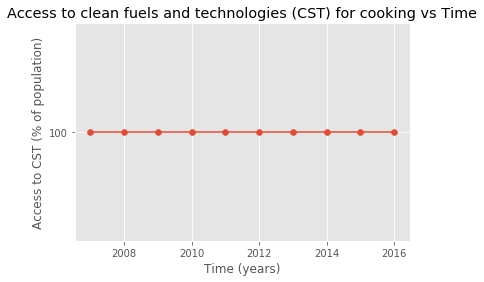

In [65]:
plot_country_data(df, "United States", False, True, 2007, 2016, [], "Access to clean fuels and technologies (CST) for cooking vs Time", "Time (years)", "Access to CST (% of population)", "COOKus.png", True)


0


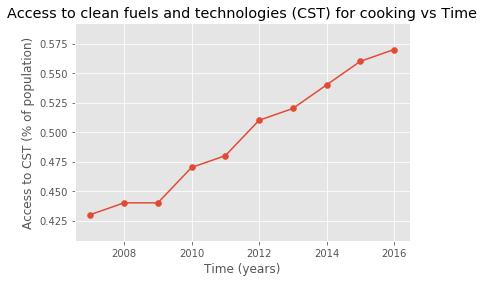

In [66]:
plot_country_data(df, "Rwanda", False, True, 2007, 2016, [], "Access to clean fuels and technologies (CST) for cooking vs Time", "Time (years)", "Access to CST (% of population)", "COOKrwanda.png", False)


In [55]:
find_fastest_declining_region(df, "2010", "2016")

Declines: Andorra
Declines: Australia
Declines: Austria
Declines: Belgium
Declines: Bahrain
Declines: Bahamas, The
Declines: Bolivia
Declines: Brunei Darussalam
Declines: Canada
Declines: Switzerland
Declines: Cote d'Ivoire
Declines: Cyprus
Declines: Germany
Declines: Denmark
Declines: Spain
Declines: Finland
Declines: France
Declines: United Kingdom
Declines: Hungary
Declines: Ireland
Declines: Iceland
Declines: Israel
Declines: Italy
Declines: Japan
Declines: St. Kitts and Nevis
Declines: Korea, Rep.
Declines: Kuwait
Declines: Lithuania
Declines: Luxembourg
Declines: Monaco
Declines: Madagascar
Declines: Mali
Declines: Malta
Declines: Malaysia
Declines: North America
Declines: Netherlands
Declines: Norway
Declines: New Zealand
Declines: Poland
Declines: Portugal
Declines: Saudi Arabia
Declines: Senegal
Declines: Singapore
Declines: San Marino
Declines: Sao Tome and Principe
Declines: Slovak Republic
Declines: Sweden
Declines: Chad
Declines: Uganda
Declines: United States
Declines: Ve

(-2.0916666666663017, 'Bolivia')

In [56]:
find_fastest_growing_region(df, "2010", "2016")

Inclines: Afghanistan
Inclines: Angola
Inclines: Albania
Inclines: Arab World
Inclines: United Arab Emirates
Inclines: Argentina
Inclines: Armenia
Inclines: Antigua and Barbuda
Inclines: Azerbaijan
Inclines: Burundi
Inclines: Benin
Inclines: Burkina Faso
Inclines: Bangladesh
Inclines: Bulgaria
Inclines: Bosnia and Herzegovina
Inclines: Belarus
Inclines: Belize
Inclines: Brazil
Inclines: Barbados
Inclines: Bhutan
Inclines: Botswana
Inclines: Central African Republic
Inclines: Central Europe and the Baltics
Inclines: Chile
Inclines: China
Inclines: Cameroon
Inclines: Congo, Dem. Rep.
Inclines: Congo, Rep.
Inclines: Colombia
Inclines: Comoros
Inclines: Cabo Verde
Inclines: Costa Rica
Inclines: Caribbean small states
Inclines: Cuba
Inclines: Czech Republic
Inclines: Djibouti
Inclines: Dominica
Inclines: Dominican Republic
Inclines: Algeria
Inclines: East Asia & Pacific (excluding high income)
Inclines: Early-demographic dividend
Inclines: East Asia & Pacific
Inclines: Europe & Central Asia

(3.3599999999994177, 'Vietnam')

0


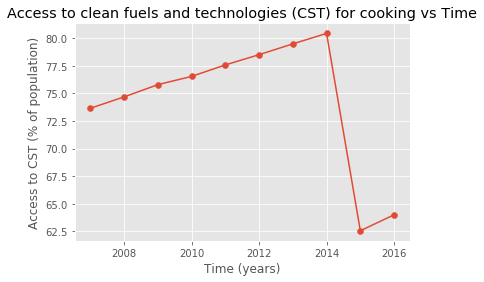

In [59]:
plot_country_data(df, "Bolivia", False, True, 2007, 2016, [], "Access to clean fuels and technologies (CST) for cooking vs Time", "Time (years)", "Access to CST (% of population)", "COOKbolivia.png", False)


0


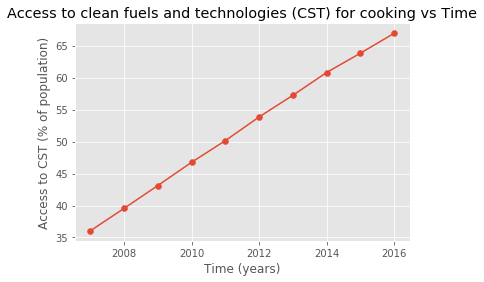

In [60]:
plot_country_data(df, "Vietnam", False, True, 2007, 2016, [], "Access to clean fuels and technologies (CST) for cooking vs Time", "Time (years)", "Access to CST (% of population)", "COOKvietnam.png", False)
